In [262]:
##import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import  OneHotEncoder , LabelEncoder , LabelBinarizer ,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

%matplotlib inline



In [263]:
## import  data 
train=pd.read_csv('training.csv',delimiter=';')
validation=pd.read_csv('validation.csv',delimiter=';')

In [264]:
train.head()

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,a,"17,92","5,4e-05",u,g,c,v,"1,75",f,t,1,t,g,80.0,5,800000.0,t,0,no.
1,b,"16,92","3,35e-05",y,p,k,v,"0,29",f,f,0,f,s,200.0,0,2000000.0,NaN,0,no.
2,b,"31,25","0,0001125",u,g,ff,ff,0,f,t,1,f,g,96.0,19,960000.0,t,0,no.
3,a,"48,17","0,0001335",u,g,i,o,"0,335",f,f,0,f,g,0.0,120,0.0,NaN,0,no.
4,b,"32,33","0,00035",u,g,k,v,"0,5",f,f,0,t,g,232.0,0,2320000.0,f,0,no.


In [265]:
validation.head()

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,b,"32,33","0,00075",u,g,e,bb,"1,585",t,f,0,t,s,420.0,0,4200000.0,NaN,1,no.
1,b,"23,58","0,000179",u,g,c,v,"0,54",f,f,0,t,g,136.0,1,1360000.0,NaN,0,no.
2,b,"36,42","7,5e-05",y,p,d,v,"0,585",f,f,0,f,g,240.0,3,2400000.0,NaN,1,no.
3,b,"18,42","0,0010415",y,p,aa,v,"0,125",t,f,0,f,g,120.0,375,1200000.0,NaN,0,no.
4,b,"24,5","0,0013335",y,p,aa,v,"0,04",f,f,0,t,g,120.0,475,1200000.0,f,1,no.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024960CEBBE0>,
      dtype=object)

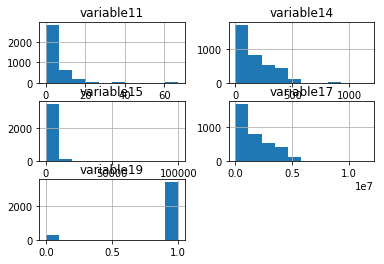

In [266]:
train.hist()

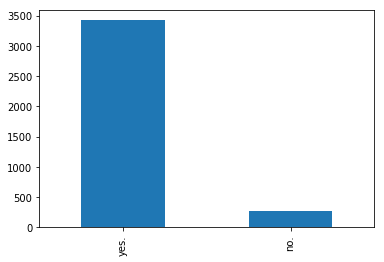

In [267]:
##number of classes yes  no 
train['classLabel'].value_counts().plot(kind='bar')

In [268]:
##number of null values in train 
train.isnull().sum()

variable1       39
variable2       39
variable3        0
variable4       64
variable5       64
variable6       66
variable7       66
variable8        0
variable9        0
variable10       0
variable11       0
variable12       0
variable13       0
variable14     100
variable15       0
variable17     100
variable18    2145
variable19       0
classLabel       0
dtype: int64

In [269]:
## type of data in training
train.dtypes

variable1      object
variable2      object
variable3      object
variable4      object
variable5      object
variable6      object
variable7      object
variable8      object
variable9      object
variable10     object
variable11      int64
variable12     object
variable13     object
variable14    float64
variable15      int64
variable17    float64
variable18     object
variable19      int64
classLabel     object
dtype: object

In [270]:
### imputing nan values in training 
cols=train.columns

for col in cols :
    if train[col].dtype =='object':
        train[col]=train[col].replace(np.nan,train[col].mode()[0])
    else:
        train[col]=train[col].replace(np.nan,train[col].mean())
       
        

In [271]:
### imputing nan values in validation 
cols=validation.columns

for col in cols :
    if validation[col].dtype =='object':
        validation[col]=validation[col].replace(np.nan,validation[col].mode()[0])
    else:
        validation[col]=validation[col].replace(np.nan,validation[col].mean())
       
        

In [272]:
## there is no null values
validation.isnull().sum()

variable1     0
variable2     0
variable3     0
variable4     0
variable5     0
variable6     0
variable7     0
variable8     0
variable9     0
variable10    0
variable11    0
variable12    0
variable13    0
variable14    0
variable15    0
variable17    0
variable18    0
variable19    0
classLabel    0
dtype: int64

In [273]:
## convert catecorical values to numerical values
train_dfs=[]
valid_dfs=[]
for col in cols:
    if train[col].dtype=='object':
        lb=LabelBinarizer()
        _train=lb.fit_transform(train[col])
        _valid=lb.transform(validation[col])
        train_df=pd.DataFrame(_train)
        valid_df=pd.DataFrame(_valid)
        train_dfs.append(train_df)
        valid_dfs.append(valid_df)
        
        
        
        

In [274]:
train_df=pd.concat(train_dfs,axis=1)
valid_df=pd.concat(valid_dfs,axis=1)

In [275]:
### deal with numeric values
for col in cols:
    if train[col].dtype!='object':
        min_max=MinMaxScaler()
        train[col]=min_max.fit_transform(train[col].values.reshape(-1,1))
        validation[col]=min_max.transform(validation[col].values.reshape(-1,1))
        


C:\Users\rehab\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\rehab\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\rehab\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [276]:
y_train=train_df.iloc[:,-1].values
y_valid=valid_df.iloc[:,-1].values

In [277]:
## concat categorical with numerical 
train_df=train_df.iloc[:,:-1]
valid_df=valid_df.iloc[:,:-1]
for col in cols:
    if train[col].dtype!='object':
        train_df=pd.concat([train_df,train[col]],axis=1)
        valid_df=pd.concat([valid_df,validation[col]],axis=1)


In [279]:
train_df.head()

,0,0,1,2,3,4,5,6,7,8,...,0,0,1,2,0,variable11,variable14,variable15,variable17,variable19
0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0.014925,0.068966,0.00005,0.068966,0.0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0.000000,0.172414,0.00000,0.172414,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0.014925,0.082759,0.00019,0.082759,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0.000000,0.000000,0.00120,0.000000,0.0
4,1,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0.000000,0.200000,0.00000,0.200000,0.0


In [280]:
## split training data 
x_train=train_df.iloc[:,:-1].values

x_valid=valid_df.iloc[:,:-1].values


In [281]:
## fitting logistic regression model
log=LogisticRegression()
log.fit(x_train,y_train)


C:\Users\rehab\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [282]:
## predict with logisyic regression 
predicted=log.predict(x_valid)


In [283]:
acc=accuracy_score(y_valid,predicted)
print('Accuracy of Logistic Regression %s ',acc)

Accuracy of Logistic Regression %s  0.82


In [284]:
## fitting decision tree model
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(x_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [285]:
##predict with decision tree
predicted_tree=classifier.predict(x_valid)

In [286]:
## accuracy
acc1=accuracy_score(y_valid,predicted_tree)
print('Accuracy of DecisionTreeClassifier %s ',acc1)

Accuracy of DecisionTreeClassifier %s  0.84


In [288]:
## fitting naive_bayes model
from sklearn.naive_bayes import GaussianNB
classifier1 = GaussianNB()
classifier1.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [289]:
## predict with naive_bayes
predicted=classifier1.predict(x_valid)
acc2=accuracy_score(y_valid,predicted)
print('Accuracy of naive_bayes %s ',acc2)

Accuracy of naive_bayes %s  0.58


In [290]:
## fitting support vector machine
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_valid)
acc3=accuracy_score(y_valid,y_pred)
print('Accuracy of support vector machine %s ',acc3)

C:\Users\rehab\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of support vector machine %s  0.465
